### Diferencias Finitas

In [32]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt


b) Encuentre el potencial eléctrico dentro del cuadrado usando el método de diferencias finitas, considerando una grilla de celdas cuadradas de 0.1 cm de lado. Haga una gráfica donde se indique con diferentes colores como cambia el potencial eléctrico dentro de la caja como una función de las coordenadas x e y.

In [48]:
h = 0.1
@jit
def solucionEcuLaplace(dx_dy, condiciones):
    malla = np.zeros((dx_dy, dx_dy))
    v_0_0, v_0_f, v_f_0, v_f_f = condiciones

    malla[0, 1:-1] = v_0_0
    malla[-1, 1:-1] = v_0_f
    malla[1:-1, 0] = v_f_0
    malla[1:-1, -1] = v_f_f

    malla[0, 0] = 5
    malla[0, -1] = 0
    malla[-1, 0] = 0
    malla[-1, -1] = 0

    convergencia = 0.01
    delta_actual = 1

    while delta_actual > convergencia:
        delta_i_j = 0
        for i in range(1, dx_dy - 1):
            for j in range(1, dx_dy - 1):
                V_v_c = (malla[i-1][j] + malla[i+1][j] + malla[i][j-1] + malla[i][j+1]) / 4
                V_s_c = (malla[i-1][j-1] + malla[i-1][j+1] + malla[i+1][j-1] + malla[i+1][j+1]) / 4
                V_i_j = 2/3 * V_v_c + 1/3 * V_s_c

                delta_i_j += (V_i_j - malla[i, j]) / V_i_j
                malla[i, j] = V_i_j

        delta_actual = delta_i_j / ((dx_dy - 2) ** 2)

    return malla

dx_dy = int(10 / h) 
condiciones = 0, 5, 0, 0
malla = solucionEcuLaplace(dx_dy, condiciones)

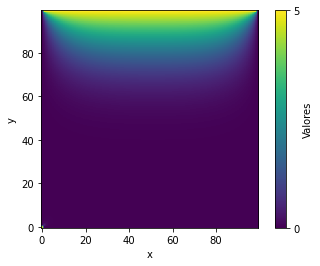

In [51]:

fig, ax = plt.subplots()
img = ax.imshow(malla, cmap='viridis')  

cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Valores') 
cbar.set_ticks([np.min(malla), np.max(malla)])  

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.invert_yaxis()

plt.savefig("potencialElectrico.jpeg")
plt.show()


c)  Calcule la diferencia: $\Delta V = V_{df} − V_{teo}$ para los diferentes puntos de la grilla del punto anterior. Donde $V_{df}$ corresponde al calculo realizado por diferencias finitas y $V_{teo}$ el calculo analítico Indique en que posiciones x, y hay mayor diferencia y dé el valor porcentual de dicha diferencia: $\frac{\Delta V}{V_{teo}}$. En cuanto se disminuye la diferencia porcentual si hace una grilla de 0.01 cm?

In [52]:
x = np.arange(0, 10, h)
y= np.arange(10, 0, -h)

constante = 2 * np.arange(0, 99) + 1
constante_pi = constante * np.pi

termino1 = (10 * (1 - (-1) ** constante)) / (constante * np.pi * np.sinh(constante_pi))

mallaDiferencias = np.zeros((100,100))
mallaAnalitica = np.zeros((100,100))

diferencia = 0
diferenciaPorcentual = 0
posiciones = 0,0
posiciones_grilla = 0,0

for i, y_i in enumerate(y):
    for j, x_i in enumerate(x):
        sin_terms = np.sin((constante / 10) * np.pi * x_i) * np.sinh((constante / 10) * np.pi * y_i)
        ks = np.sum(termino1 * sin_terms)
        
        V_teo = ks
        V_df= malla[i,j]
        
        deltaV = np.abs(V_df - V_teo)
        
        mallaAnalitica[i,j] = ks
        mallaDiferencias[i,j] = deltaV
        
        if deltaV > diferencia:
            diferencia = deltaV
            posiciones = x_i, y_i
            diferenciaPorcentual = deltaV / V_teo
            posiciones_grilla = i, j
            
        
resultado = "En las coordenadas {},{} y posiciones en la grilla {},{} se tiene una diferencia de {}, con una diferencia porcentual de {}".format(posiciones[0], posiciones[1], posiciones_grilla[0], posiciones_grilla[1], diferencia, diferenciaPorcentual)

print(resultado)    



C:\Users\Asus\AppData\Local\Temp/ipykernel_12128/2387685904.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  diferenciaPorcentual = deltaV / V_teo


En las coordenadas 5.0,10.0 y posiciones en la grilla 0,50 se tiene una diferencia de 5.016075846863511, con una diferencia porcentual de 1.0


En cuanto se disminuye la diferencia porcentual si hace una grilla de 0.01 cm?

Con h de 0.1 cm, se obtiene una diferencia porcentual de 1.0 y con h de 0.01 se obtiene una diferencia porcentual también de 1.0. 

con (h = 0.1):  5.016075846863511 1.0 (5.0,10.0) (0,50)

con (h = 0.01): 5.8944378975997145 1.0 (0.05, 10.0) (0, 5)
